# Importing Required Libraries 

In [2]:
# Libraies to load the file as dataframe and To do operations on them
import pandas as pd 
import numpy as np
pd.set_option("display.max_columns", None)

# Visualization of Data through Graphs and Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Library to avoid warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing Of Data 
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split

# Models For Regression problems
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation Of Models
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# To find best parameters for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# For creating a final pipeline 
from sklearn.base import BaseEstimator,TransformerMixin  # Parent classes to define custom transformers
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Loading DataSet

In [9]:
df=pd.read_csv(r"..\data\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# Handling missing values
print("Is there any missing value in dataset : ",any(df.isnull().sum()))

# Duplicates
print("Is there any duplicated row in dataset : ",any(df.duplicated()))

Is there any missing value in dataset :  False
Is there any duplicated row in dataset :  False


In [12]:
# Since The CarName has pair of brand name and its model
# We can just Extract two fetures from it (It would Encoding of CarName easier)
temp=pd.DataFrame()
temp["Brand"]=df["CarName"].str.split(" ").str[0]
temp["Model"]=df["CarName"].str.split(" ").str[1]
temp.head()

,Brand,Model
0,alfa-romero,giulia
1,alfa-romero,stelvio
2,alfa-romero,Quadrifoglio
3,audi,100
4,audi,100ls


In [13]:
df["Brand"] = temp["Brand"]
df["Model"] = temp["Model"]
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [14]:
df["Brand"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We can see that there are some spelling mistakes which are increasing the no. of unique values

In [15]:
brand_corrections = {
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'Nissan': 'nissan'  
}
# Replacing Incorrect Brand Names With Correct Names
df["Brand"]=df["Brand"].replace(brand_corrections)
df["Brand"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
df["Model"].unique()

array(['giulia', 'stelvio', 'Quadrifoglio', '100', '100ls', 'fox', '5000',
       '4000', '5000s', '320i', 'x1', 'x3', 'z4', 'x4', 'x5', 'impala',
       'monte', 'vega', 'rampage', 'challenger', 'd200', 'monaco', 'colt',
       'coronet', 'dart', 'civic', 'accord', 'prelude', 'MU-X', 'D-Max',
       'xj', 'xf', 'xk', 'rx3', 'glc', 'rx2', 'rx-4', '626', 'rx-7',
       'electra', 'century', 'skyhawk', 'opel', 'skylark', 'regal',
       'cougar', 'mirage', 'lancer', 'outlander', 'g4', 'montero',
       'pajero', 'versa', 'gt-r', 'rogue', 'latio', 'titan', 'leaf',
       'juke', 'note', 'clipper', 'nv200', 'dayz', 'fuga', 'otti',
       'teana', 'kicks', '504', '304', '604sl', '505s', 'fury', 'cricket',
       'satellite', 'valiant', 'duster', 'macan', 'panamera', 'cayenne',
       'boxter', '12tl', '5', '99e', '99le', '99gle', nan, 'dl', 'brz',
       'baja', 'r1', 'r2', 'trezia', 'tribeca', 'corona', 'corolla',
       'carina', 'mark', 'celica', 'starlet', 'tercel', 'cressida',
       '

It consists of some names like diesel type model which do not carry any significant meaning related to model

In [17]:
df['Model'] = df['Model'].str.lower()

# There are no null values but even if there would be any then it would be replaced by unknown 
df['Model'] = df['Model'].fillna('unknown')

# Replacing Meaning Less model names to unknown
model_replacements = {
    'model': 'unknown',
    'type': 'unknown',
    'super': 'unknown',
    'diesel': 'unknown'
}
df['Model'] = df['Model'].replace(model_replacements)
df["Model"].unique()

array(['giulia', 'stelvio', 'quadrifoglio', '100', '100ls', 'fox', '5000',
       '4000', '5000s', '320i', 'x1', 'x3', 'z4', 'x4', 'x5', 'impala',
       'monte', 'vega', 'rampage', 'challenger', 'd200', 'monaco', 'colt',
       'coronet', 'dart', 'civic', 'accord', 'prelude', 'mu-x', 'd-max',
       'xj', 'xf', 'xk', 'rx3', 'glc', 'rx2', 'rx-4', '626', 'rx-7',
       'electra', 'century', 'skyhawk', 'opel', 'skylark', 'regal',
       'cougar', 'mirage', 'lancer', 'outlander', 'g4', 'montero',
       'pajero', 'versa', 'gt-r', 'rogue', 'latio', 'titan', 'leaf',
       'juke', 'note', 'clipper', 'nv200', 'dayz', 'fuga', 'otti',
       'teana', 'kicks', '504', '304', '604sl', '505s', 'fury', 'cricket',
       'satellite', 'valiant', 'duster', 'macan', 'panamera', 'cayenne',
       'boxter', '12tl', '5', '99e', '99le', '99gle', 'unknown', 'dl',
       'brz', 'baja', 'r1', 'r2', 'trezia', 'tribeca', 'corona',
       'corolla', 'carina', 'mark', 'celica', 'starlet', 'tercel',
       'cressi

# Visualization and Analysing the Data

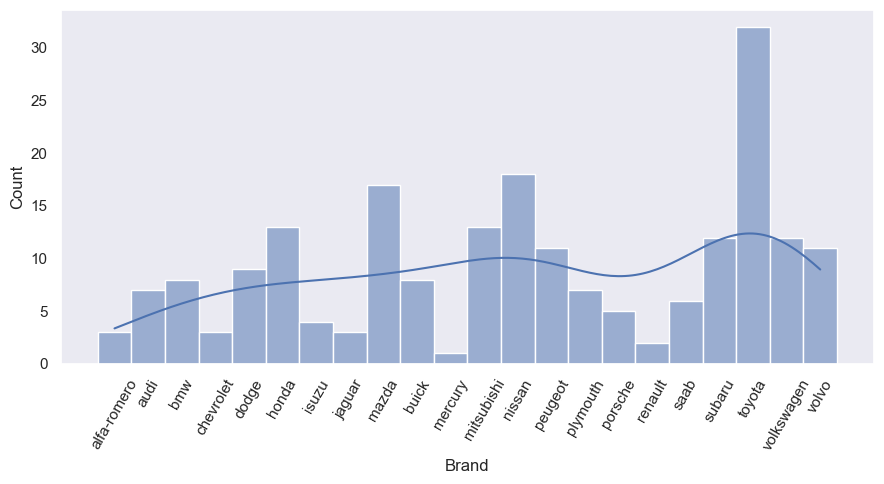

In [23]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(9,5))
sns.histplot(data=df,x="Brand",kde=True)
plt.xticks(rotation=60)
plt.tight_layout()
plt.grid(visible=False)

Most Cars Which came for resale are from Toyota Brand

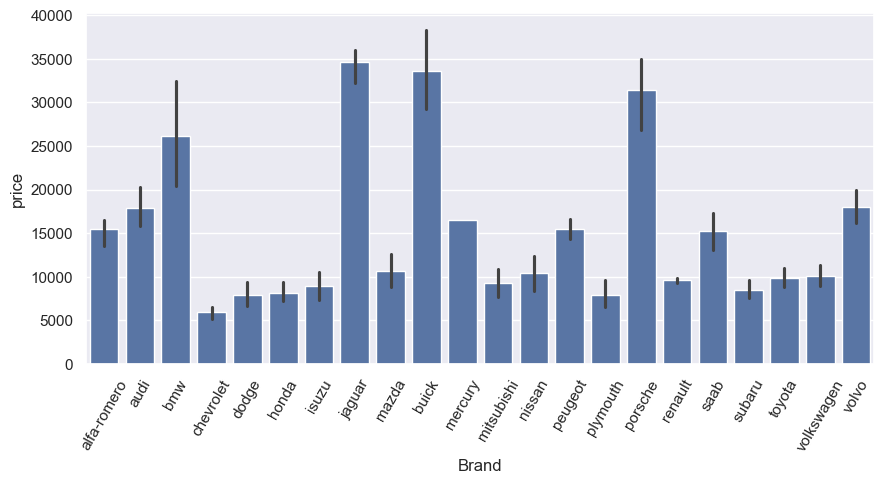

In [25]:
plt.figure(figsize=(9,5))
sns.barplot(data=df,x="Brand",y="price")
plt.xticks(rotation=60)
plt.tight_layout()

- Jaguar has highset mean resale price followed up by BUick and then porsche
- Buick had shown the maximum Resale Price

<Axes: xlabel='count', ylabel='symboling'>

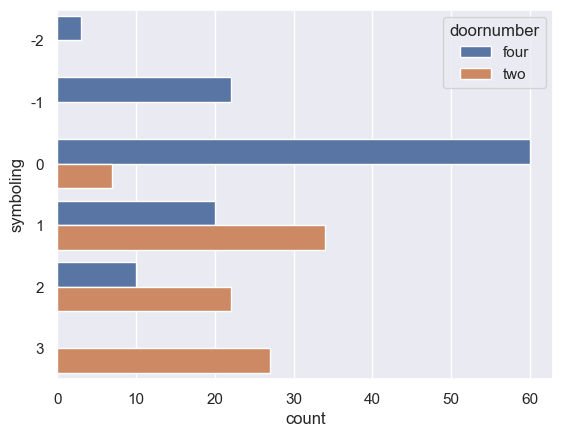

In [26]:
sns.countplot(data=df,y="symboling",hue="doornumber")

Four Door Cars Are common and most cars are rate as symboling 0 showing that they have minmal damages but totally safe to use

<Axes: xlabel='horsepower', ylabel='price'>

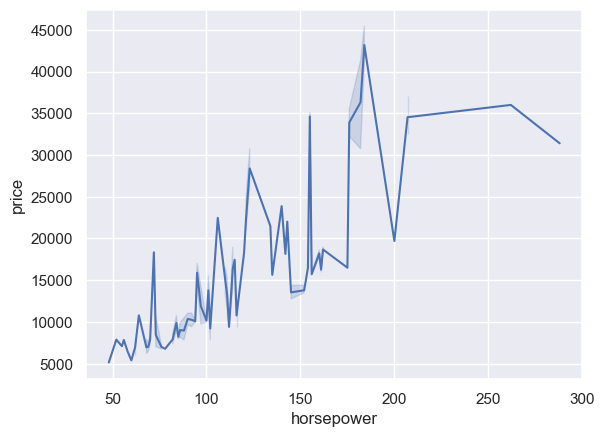

In [64]:
sns.lineplot(data=df,x="horsepower",y="price")

Linear Relation between horsepower and their price with many outliers 

# Preprocessing Of Data 

In [29]:
df['No. of doors']=df["doornumber"].replace({'two':2,'four':4}).astype(int)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model,No. of doors
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,2
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,2
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,quadrifoglio,2
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100,4
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,4


In [30]:
df["No. of Cylinders"]=df["cylindernumber"].replace({'four':4, 'six':6, 'five':5, 'three':3 ,'twelve':12 ,'two':2 ,'eight':8})
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model,No. of doors,No. of Cylinders
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,2,4
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,2,4
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,quadrifoglio,2,6
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100,4,4
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,4,5


In [31]:
df.drop("car_ID",axis=1,inplace=True)
df.drop("doornumber",axis=1,inplace=True)
df.drop("cylindernumber",axis=1,inplace=True)
df.drop("CarName",axis=1,inplace=True)
df.head()

,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model,No. of doors,No. of Cylinders
0,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,2,4
1,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,2,4
2,1,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,quadrifoglio,2,6
3,2,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100,4,4
4,2,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,4,5


### Saving the File for Future Use

In [33]:
df.to_csv("../data/cleaned_data.csv",index=False)

# Encoding The Categorical Features 

In [47]:
X=df.drop("price",axis=1)
y=df["price"]

In [48]:
categorical=[col for col in X.columns if X[col].dtype=='O']
numerical=[col for col in X.columns if X[col].dtype!='O']
print(categorical)
print(numerical)

['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'Brand', 'Model']
['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'No. of doors', 'No. of Cylinders']


In [49]:
for i in categorical:
    print(i)
    print(f"Uniques Terms : {X[i].unique()}")
    print(f"No. of Unique Terms : {X[i].nunique()}")

fueltype
Uniques Terms : ['gas' 'diesel']
No. of Unique Terms : 2
aspiration
Uniques Terms : ['std' 'turbo']
No. of Unique Terms : 2
carbody
Uniques Terms : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
No. of Unique Terms : 5
drivewheel
Uniques Terms : ['rwd' 'fwd' '4wd']
No. of Unique Terms : 3
enginelocation
Uniques Terms : ['front' 'rear']
No. of Unique Terms : 2
enginetype
Uniques Terms : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
No. of Unique Terms : 7
fuelsystem
Uniques Terms : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
No. of Unique Terms : 8
Brand
Uniques Terms : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
No. of Unique Terms : 22
Model
Uniques Terms : ['giulia' 'stelvio' 'quadrifoglio' '100' '100ls' 'fox' '5000' '4000'
 '5000s' '320i' 'x1' 'x3' 'z4' 'x4' 'x5' 'impala' 'monte' 'vega' '

In [50]:
Binary_encode = [x for x in categorical if X[x].nunique()==2]                         # Categories That Can Be Encoded in Binary (0 or 1)
one_hot = [x for x in categorical if X[x].nunique()>2 and X[x].nunique()<10]          # Features for One Hot Encoding
label_encode=[x for x in categorical if x not in Binary_encode and x not in one_hot ] # Custom Encoding Through Mapping 
print(Binary_encode)
print(one_hot)
print(label_encode)

['fueltype', 'aspiration', 'enginelocation']
['carbody', 'drivewheel', 'enginetype', 'fuelsystem']
['Brand', 'Model']


In [51]:
# Encoding The Brand Names on The Basis of Their Popularity
brand_counts = X["Brand"].value_counts().sort_values(ascending=True)
brand_encoder={brand:rank for rank,brand in enumerate(brand_counts.index[::])}
brand_encoder

{'mercury': 0,
 'renault': 1,
 'chevrolet': 2,
 'alfa-romero': 3,
 'jaguar': 4,
 'isuzu': 5,
 'porsche': 6,
 'saab': 7,
 'plymouth': 8,
 'audi': 9,
 'bmw': 10,
 'buick': 11,
 'dodge': 12,
 'volvo': 13,
 'peugeot': 14,
 'subaru': 15,
 'volkswagen': 16,
 'mitsubishi': 17,
 'honda': 18,
 'mazda': 19,
 'nissan': 20,
 'toyota': 21}

In [52]:
X["Brand_Encoded"]=X["Brand"].map(brand_encoder)
X.head()

,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Brand,Model,No. of doors,No. of Cylinders,Brand_Encoded
0,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero,giulia,2,4,3
1,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero,stelvio,2,4,3
2,1,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero,quadrifoglio,2,6,3
3,2,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi,100,4,4,9
4,2,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi,100ls,4,5,9


In [53]:
# Encoding The Model Names According To the Brand They belong and popularity
model_encoder={}
for brand in X["Brand"].unique():
    model_brand= X[X["Brand"]==brand]["Model"]
    model_counts=model_brand.value_counts().sort_values(ascending=True)

    model_encoder.update({model:rank for rank,model in enumerate(model_counts.index)})
model_encoder

{'giulia': 0,
 'stelvio': 1,
 'quadrifoglio': 2,
 '100': 0,
 'fox': 1,
 '5000': 2,
 '4000': 3,
 '5000s': 4,
 '100ls': 5,
 'z4': 0,
 'x1': 1,
 'x5': 2,
 'x4': 3,
 '320i': 4,
 'x3': 5,
 'impala': 0,
 'monte': 1,
 'vega': 2,
 'd200': 0,
 'rampage': 1,
 'monaco': 2,
 'challenger': 3,
 'dart': 4,
 'coronet': 5,
 'colt': 6,
 'prelude': 0,
 'accord': 1,
 'civic': 2,
 'mu-x': 0,
 'd-max': 1,
 'xj': 0,
 'xf': 1,
 'xk': 2,
 'rx2': 0,
 'rx3': 1,
 'rx-4': 2,
 'rx-7': 3,
 '626': 4,
 'glc': 5,
 'electra': 0,
 'skyhawk': 1,
 'opel': 2,
 'skylark': 3,
 'regal': 4,
 'century': 5,
 'cougar': 0,
 'lancer': 0,
 'montero': 1,
 'pajero': 2,
 'outlander': 3,
 'g4': 4,
 'mirage': 5,
 'gt-r': 0,
 'versa': 1,
 'leaf': 2,
 'titan': 3,
 'juke': 4,
 'dayz': 5,
 'nv200': 6,
 'note': 7,
 'otti': 8,
 'teana': 9,
 'kicks': 10,
 'fuga': 11,
 'latio': 12,
 'rogue': 13,
 'clipper': 14,
 '505s': 0,
 '304': 1,
 '604sl': 2,
 '504': 3,
 'cricket': 0,
 'satellite': 1,
 'valiant': 2,
 'duster': 3,
 'fury': 4,
 'macan': 0,
 'pa

In [54]:
X["Model_Encoded"]=X["Model"].map(model_encoder)
X[["Brand_Encoded","Model_Encoded"]]

,Brand_Encoded,Model_Encoded
0,3,0
1,3,1
2,3,2
3,9,0
4,9,5
...,...,...
200,13,3
201,13,6
202,13,5
203,13,1


In [55]:
X.drop(["Brand","Model"],axis=1,inplace=True)
X.head()

,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,No. of doors,No. of Cylinders,Brand_Encoded,Model_Encoded
0,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,2,4,3,0
1,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,2,4,3,1
2,1,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,152,mpfi,2.68,3.47,9.0,154,5000,19,26,2,6,3,2
3,2,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,mpfi,3.19,3.40,10.0,102,5500,24,30,4,4,9,0
4,2,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,136,mpfi,3.19,3.40,8.0,115,5500,18,22,4,5,9,5


In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [57]:
# Encoding And Standardizing for Model Training and Evaluation
Oh_encoder = OneHotEncoder(sparse_output=False)
Binary_encoder=OrdinalEncoder()
scaler=StandardScaler()

binary_encoded=pd.DataFrame(Binary_encoder.fit_transform(X_train[Binary_encode]),columns=Binary_encoder.get_feature_names_out(Binary_encode))
Oh_Encoded=pd.DataFrame(Oh_encoder.fit_transform(X_train[one_hot]),columns=Oh_encoder.get_feature_names_out(one_hot))
scaled_cols = numerical + ["Brand_Encoded", "Model_Encoded"]  
scaled_ = pd.DataFrame(
    scaler.fit_transform(X_train[scaled_cols]),columns=scaled_cols)
X_encoded = pd.concat([binary_encoded, Oh_Encoded, scaled_], axis=1)
X_encoded.head()

,fueltype,aspiration,enginelocation,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,No. of doors,No. of Cylinders,Brand_Encoded,Model_Encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.727380,1.037085,0.072450,0.083817,0.276779,0.281287,0.188010,0.405836,1.215101,3.099860,-0.815386,-1.917829,0.964316,1.313501,0.917985,-0.352479,0.813871,-0.106233
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.727380,1.541231,1.043916,1.170268,1.207269,1.016045,-0.158993,0.517384,-3.360166,-0.439591,-0.241894,-0.292907,-0.988126,-1.024569,0.917985,-0.352479,-0.077149,-0.106233
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.727380,-0.508962,-0.367616,-1.097108,2.178216,-0.541642,-0.852999,-1.007108,-0.709667,-0.283439,-1.064730,-0.699137,0.964316,1.001758,0.917985,-0.352479,1.170280,0.939100
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078636,-0.710620,-0.732953,-1.002634,0.317235,-1.147082,-0.729070,-0.635281,0.110726,-0.179337,-0.890189,0.113323,0.964316,1.001758,0.917985,-0.352479,0.992075,3.029766
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.727380,-0.374523,-0.550285,-0.341316,-0.168238,-0.524008,-0.406852,-0.635281,1.025779,-0.283439,-0.466304,1.332015,0.313502,0.378273,-1.089342,-0.352479,0.635667,-0.454677


In [59]:
binary_encoded_1=pd.DataFrame(Binary_encoder.transform(X_test[Binary_encode]),columns=Binary_encoder.get_feature_names_out(Binary_encode))
Oh_Encoded_1=pd.DataFrame(Oh_encoder.transform(X_test[one_hot]),columns=Oh_encoder.get_feature_names_out(one_hot))
scaled_cols= numerical + ["Brand_Encoded", "Model_Encoded"]  
scaled_test = pd.DataFrame(
    scaler.transform(X_test[scaled_cols]),columns=scaled_cols)
X_encoded_test = pd.concat([binary_encoded_1, Oh_Encoded_1, scaled_test], axis=1)
X_encoded_test.head()

,fueltype,aspiration,enginelocation,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,No. of doors,No. of Cylinders,Brand_Encoded,Model_Encoded
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.727380,0.801817,1.234887,0.461713,0.802708,1.319744,2.046956,1.112308,0.426262,-0.543692,1.927399,0.519554,-1.476237,-1.336311,0.917985,1.453977,-0.789966,-0.106233
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.727380,0.129623,0.338150,0.934083,-0.694167,0.972939,0.113653,-0.709646,0.457815,-0.803946,1.378842,0.722669,-1.476237,-1.336311,-1.089342,0.550749,-0.968170,0.242211
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.727380,-0.256889,-0.060400,-0.341316,0.398147,-0.498536,-0.158993,0.034009,0.678690,-0.413565,-0.192025,0.113323,0.313502,0.534144,0.917985,-0.352479,0.992075,0.939100
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.690668,0.062403,1.035612,0.272765,0.964533,0.198994,-0.134207,0.814846,-0.583452,-0.202760,0.132122,0.214881,-0.662719,-0.401083,-1.089342,-0.352479,-1.324578,-1.151566
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.533396,1.894133,1.392647,2.067771,2.016391,2.338608,1.402522,0.963577,1.215101,2.969734,0.456269,-1.613156,-0.500016,-0.868697,0.917985,0.550749,-0.611762,0.590656


# Model Training and Evaluation 

In [60]:
models={
    "Linear":LinearRegression(fit_intercept=True,n_jobs=-1),
    "Lasso": Lasso(fit_intercept=True),
    "Ridge": Ridge(fit_intercept=True),
    "ElasticNet":ElasticNet(fit_intercept=True),
    "KNN" : KNeighborsRegressor(n_jobs=-1),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(n_jobs=-1)
}

for name,model in models.items():
    model.fit(X_encoded,y_train)
    y_pred=model.predict(X_encoded_test)
    r2=r2_score(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)

    print("/"*20,name,"\\"*20)
    print("R square score : ",r2)
    print("Mean Squared Error : ",mse)
    print("Mean Absolute Error : ",mae)
    print("="*41)

//////////////////// Linear \\\\\\\\\\\\\\\\\\\\
R square score :  0.8386412004331024
Mean Squared Error :  12738312.442125661
Mean Absolute Error :  2320.7564238111004
//////////////////// Lasso \\\\\\\\\\\\\\\\\\\\
R square score :  0.8399263056734381
Mean Squared Error :  12636861.067200042
Mean Absolute Error :  2312.940831383345
//////////////////// Ridge \\\\\\\\\\\\\\\\\\\\
R square score :  0.8519271252806678
Mean Squared Error :  11689468.113553895
Mean Absolute Error :  2252.4254663612837
//////////////////// ElasticNet \\\\\\\\\\\\\\\\\\\\
R square score :  0.8086311757146484
Mean Squared Error :  15107424.460098336
Mean Absolute Error :  2746.110549715876
//////////////////// KNN \\\\\\\\\\\\\\\\\\\\
R square score :  0.7572625563739455
Mean Squared Error :  19162669.817889974
Mean Absolute Error :  2661.7056829268295
//////////////////// DecisionTree \\\\\\\\\\\\\\\\\\\\
R square score :  0.8967041529982878
Mean Squared Error :  8154589.502485098
Mean Absolute Error :  189

For This Regression Problem , Random Forest Is Predicting Very Well , So for Final model Random Forest is Selected

# HyperParameter Tuning And Cross Validation

In [61]:
rf_params = {
    "n_estimators": [50, 100, 200,500,1000],               # Number of trees
    "max_depth": [None, 5, 10, 15],               # Tree depth
    "min_samples_split": [2, 5, 10],              # Minimum samples to split an internal node
    "min_samples_leaf": [1, 2, 4],                # Minimum samples in a leaf
    "max_features": ["sqrt", "log2"],             # Features to consider at each split
    "bootstrap": [True, False],                   # Whether bootstrap samples are used
    "random_state": [42]                          # For reproducibility
}
models={
    "RandomForestRegressor":{"model":RandomForestRegressor(random_state=42),
                             "param":rf_params}
}

In [62]:
for name,config in models.items():
    grid=GridSearchCV(estimator=config['model'],param_grid=config["param"],cv=5,n_jobs=-1,scoring="r2",verbose=1)
    grid.fit(X_encoded,y_train)

    print("/"*20,name,"\\"*20)
    print("Score :",grid.best_score_)
    print("Best Parameters :",grid.best_params_)
    print("="*45)
    y_pred=grid.predict(X_encoded_test)
    r2=r2_score(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    print("R square score : ",r2)
    print("Mean Squared Error : ",mse)
    print("Mean Absolute Error : ",mae)
    print("="*41)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
//////////////////// RandomForestRegressor \\\\\\\\\\\\\\\\\\\\
Score : 0.914464395082193
Best Parameters : {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
R square score :  0.9447406941940851
Mean Squared Error :  4362391.791337536
Mean Absolute Error :  1289.4261707317069


In [65]:
X_train.head()

,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,No. of doors,No. of Cylinders,Brand_Encoded,Model_Encoded
66,0,diesel,std,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,134,idi,3.43,3.64,22.0,72,4200,31,39,4,4,19,3
111,0,gas,std,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,120,mpfi,3.46,2.19,8.4,95,5000,19,24,4,4,14,3
153,0,gas,std,wagon,fwd,front,95.7,169.7,63.6,59.1,2280,ohc,92,2bbl,3.05,3.03,9.0,62,4800,31,37,4,4,21,6
96,1,gas,std,sedan,fwd,front,94.5,165.3,63.8,54.5,1971,ohc,97,2bbl,3.15,3.29,9.4,69,5200,31,37,4,4,20,12
38,0,gas,std,hatchback,fwd,front,96.5,167.5,65.2,53.3,2289,ohc,110,1bbl,3.15,3.58,9.0,86,5800,27,33,2,4,18,2


In [68]:
X_train.describe()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,No. of doors,No. of Cylinders,Brand_Encoded,Model_Encoded
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.902439,98.728659,174.127439,65.922561,53.715854,2556.439024,126.414634,3.320854,3.254909,10.089085,104.701220,5144.207317,25.073171,30.573171,3.085366,4.390244,14.432927,3.304878
std,1.244470,5.968884,12.080544,2.123469,2.479386,511.935461,40.469014,0.269766,0.317892,3.854172,40.228058,493.839328,6.164972,6.435199,0.999401,1.110531,5.628729,2.878688
min,-2.000000,86.600000,144.600000,61.800000,47.800000,1819.000000,70.000000,2.540000,2.070000,7.000000,52.000000,4150.000000,13.000000,16.000000,2.000000,2.000000,0.000000,0.000000
25%,0.000000,94.500000,166.675000,64.175000,51.900000,2163.000000,98.000000,3.150000,3.110000,8.600000,71.500000,4800.000000,19.000000,25.000000,2.000000,4.000000,10.000000,1.000000
50%,1.000000,96.750000,173.100000,65.500000,54.100000,2422.500000,119.500000,3.310000,3.280000,9.000000,95.000000,5200.000000,24.000000,30.000000,4.000000,4.000000,16.000000,3.000000
75%,2.000000,102.100000,183.200000,66.675000,55.525000,2939.250000,141.000000,3.540000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,4.000000,4.000000,19.000000,5.000000
max,3.000000,115.600000,202.600000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,45.000000,50.000000,4.000000,12.000000,21.000000,14.000000


In [70]:
X_train["No. of Cylinders"].unique()

array([ 4,  6,  5,  2, 12,  8])